# COVID-19 France Cases Data Vizualisation Notebook
------------------

### Importing Libraries

In [1]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [2]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267


In [4]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1581,1591,1595,1605,1617,1626,1638,1645,1650,1661
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,590,598,605,612,623,631,637,646,657,672
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,312,315,317,322,322,324,328,332,333,334


#### Check the shape of the dataframes

In [6]:
confirmed_df.shape

(269, 308)

In [7]:
recoveries_df.shape

(256, 308)

In [8]:
deaths_df.shape

(269, 308)

### Delete the useless columns

In [9]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
1,Albania,0,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
2,Algeria,0,0,0,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
3,Andorra,0,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
4,Angola,0,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267


In [10]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370
1,Albania,0,0,0,0,0,0,0,0,0,...,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055
2,Algeria,0,0,0,0,0,0,0,0,0,...,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581
3,Andorra,0,0,0,0,0,0,0,0,0,...,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239
4,Angola,0,0,0,0,0,0,0,0,0,...,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117


In [11]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1581,1591,1595,1605,1617,1626,1638,1645,1650,1661
1,Albania,0,0,0,0,0,0,0,0,0,...,590,598,605,612,623,631,637,646,657,672
2,Algeria,0,0,0,0,0,0,0,0,0,...,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,75,75,75,76,76,76,76,76,76
4,Angola,0,0,0,0,0,0,0,0,0,...,312,315,317,322,322,324,328,332,333,334


### Aggregate rows by Country

In [12]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
Albania,0,0,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
Algeria,0,0,0,0,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
Andorra,0,0,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
Angola,0,0,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267


In [13]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370
Albania,0,0,0,0,0,0,0,0,0,0,...,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055
Algeria,0,0,0,0,0,0,0,0,0,0,...,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581
Andorra,0,0,0,0,0,0,0,0,0,0,...,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239
Angola,0,0,0,0,0,0,0,0,0,0,...,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117


In [14]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1581,1591,1595,1605,1617,1626,1638,1645,1650,1661
Albania,0,0,0,0,0,0,0,0,0,0,...,590,598,605,612,623,631,637,646,657,672
Algeria,0,0,0,0,0,0,0,0,0,0,...,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236
Andorra,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,76,76,76,76,76,76
Angola,0,0,0,0,0,0,0,0,0,0,...,312,315,317,322,322,324,328,332,333,334


#### Check the shape of the new dataframes

In [15]:
confirmed_df_aggregated.shape

(191, 304)

In [16]:
recoveries_df_aggregated.shape

(191, 304)

In [17]:
deaths_df_aggregated.shape

(191, 304)

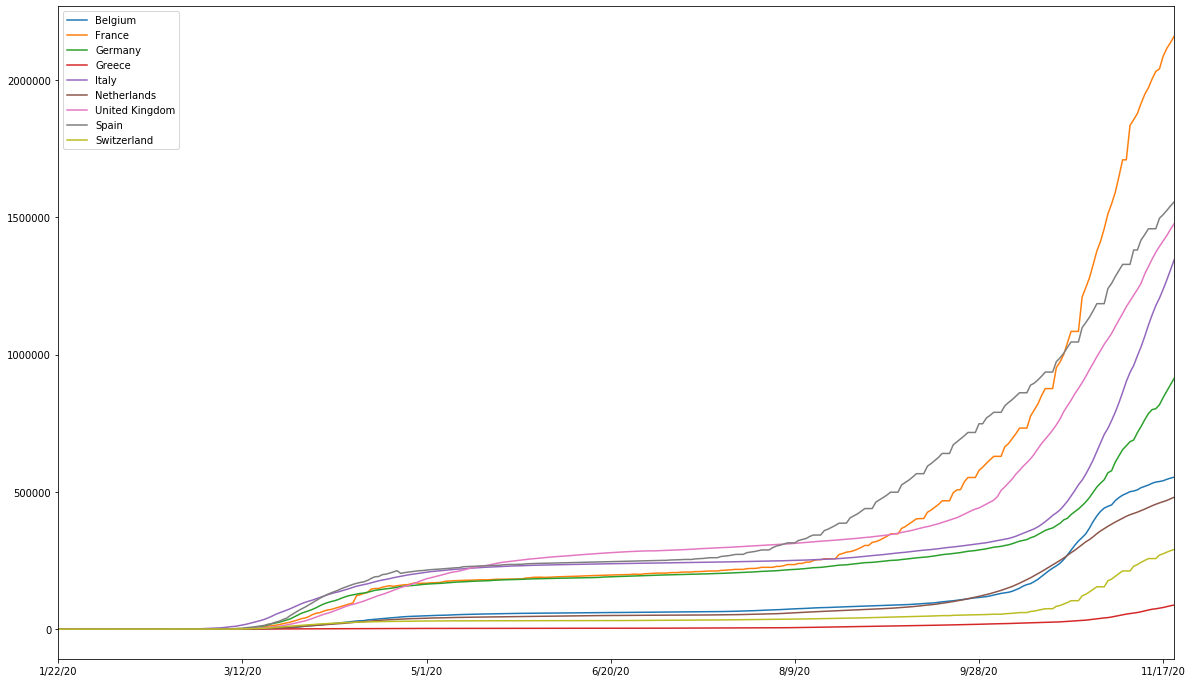

In [35]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Greece"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Netherlands"].plot()
confirmed_df_aggregated.loc ["United Kingdom"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
confirmed_df_aggregated.loc ["Switzerland"].plot()
plt.legend()

In [19]:
confirmed_df = confirmed_df[confirmed_df['Country/Region']=='France']
deaths_df = deaths_df[deaths_df['Country/Region']=='France']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='France']

In [20]:
confirmed_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
deaths_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
recoveries_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)

In [21]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [22]:
### Replace NaN values by 0
confirmed_df.fillna(0, inplace=True)
deaths_df.fillna(0, inplace=True)
recoveries_df.fillna(0, inplace=True)

In [23]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [24]:
###Convert integer into datetime for better visualization
start = '1/24/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [25]:
dates = confirmed.keys()
france_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    france_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [26]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
france_cases = np.array(france_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [27]:
###Future forecast
days_in_future = 1
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-1]

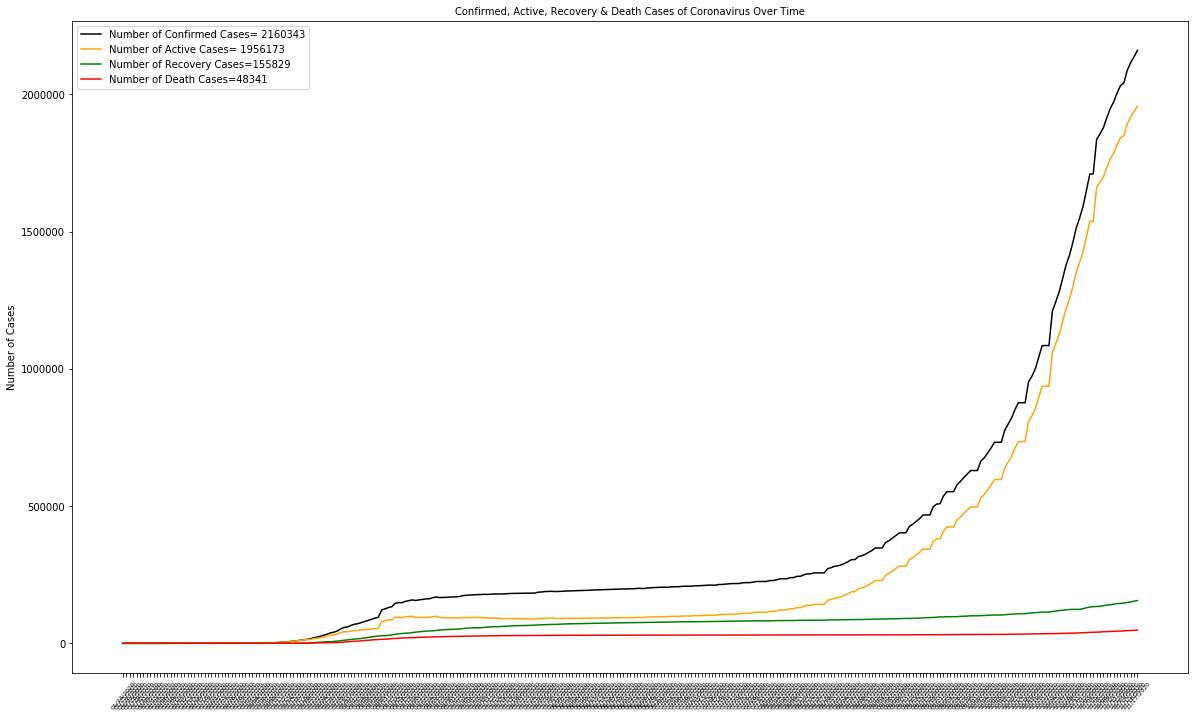

In [32]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, france_cases, color='black')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovery & Death Cases of Coronavirus Over Time', size=10)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation=50, size=6)
plt.show()

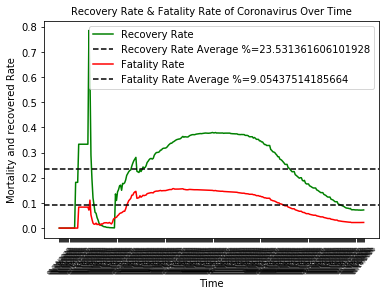

In [29]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate & Fatality Rate of Coronavirus Over Time', size=10)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_recovery_rate*100),'Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper right', fontsize=10)
plt.xlabel('Time')
plt.ylabel('Mortality and recovered Rate')
plt.xticks(rotation=50, size=6)
plt.show()

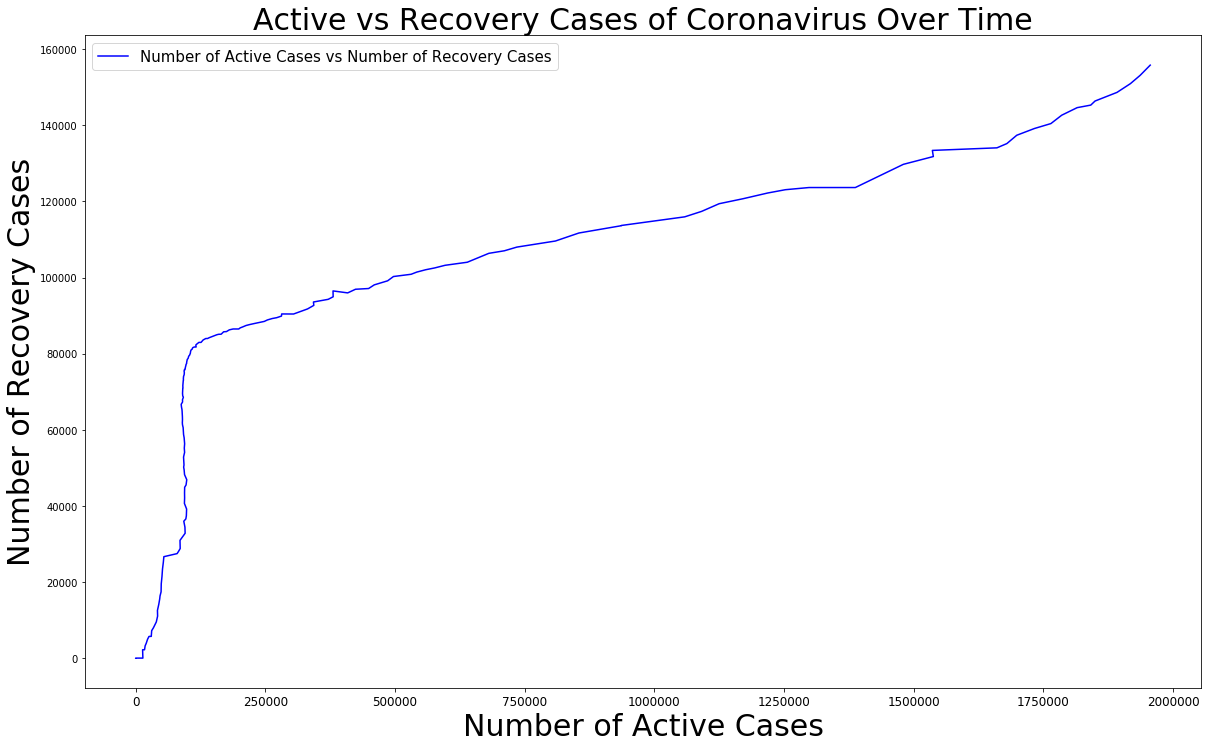

In [30]:
##Active vs recovered Cases Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, total_recovered, color='blue')
plt.title('Active vs Recovery Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active Cases vs Number of Recovery Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Recovery Cases', size=30)
plt.xticks(size=12)
plt.show()